In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as mp
import seaborn as sb
import pandas as pd
import numpy as np
import math

In [12]:
df_scouting = pd.read_csv("ScoutingVenturaTest.csv")

In [13]:
df_scouting

,Marca temporal,Scouter,Match,Team,Aliance,Autonomous Cubos [AutoCubo3],Autonomous Cubos [AutoCubo2],Autonomous Cubos [AutoCubo1],Autonomous Conos [AutoCono3],Autonomous Conos [AutoCono2],...,Teleop Cubos [TOCubo2],Teleop Cubos [TOCubo1],Teleop Conos [TOCono3],Teleop Conos [TOCono2],Teleop Conos [TOCono1],Teleop Charge Station,Teleop Park,Disconnection Time,Defensive Rank,TeleOp Comentarios Extras
0,14/10/2023 14:20:17,Delfin,1,973,Red,0,1,0,0,0,...,1,0,1,0,0,Engaged,Si,0,1,h
1,14/10/2023 14:20:44,Pepe,1,4,Red,3,0,0,0,0,...,2,2,0,0,0,Engaged,Si,10,2,NaN
2,14/10/2023 14:21:37,Delfin,1,1138,Red,0,0,1,0,0,...,1,2,0,0,0,Engaged,Si,0,2,gh
3,14/10/2023 14:22:12,Pepe,1,589,Blue,0,0,0,3,3,...,0,3,4,3,0,Engaged,Si,0,2,NaN
4,14/10/2023 14:22:24,Delfin,1,1148,Blue,0,0,0,0,0,...,0,1,0,0,2,Nothing,Si,0,1,NaN
5,14/10/2023 14:27:20,Delfin,3,973,Red,0,0,2,0,0,...,0,0,0,1,2,"Docked (Not touching the ground, CS not Balan...",No,10,1,NaN
6,14/10/2023 14:28:40,Pepe,1,589,Blue,0,0,0,0,1,...,0,3,0,4,0,Engaged,Si,0,2,NaN
7,14/10/2023 14:31:32,Delfin,3,589,Red,0,0,0,1,0,...,0,3,0,1,1,Nothing,No,60,1,NaN
8,14/10/2023 14:33:51,Delfin,3,599,Red,0,1,2,0,0,...,1,0,0,0,0,Nothing,Si,0,1,NaN
9,14/10/2023 14:34:06,Pepe,3,4,Blue,2,0,0,0,0,...,3,3,0,0,0,Engaged,Si,21,2,NaN


In [14]:
df_scouting.columns

Index(['Marca temporal', 'Scouter', 'Match', 'Team', 'Aliance',
       'Autonomous Cubos [AutoCubo3]', 'Autonomous Cubos [AutoCubo2]',
       'Autonomous Cubos [AutoCubo1]', 'Autonomous Conos [AutoCono3]',
       'Autonomous Conos [AutoCono2]', 'Autonomous Conos [AutCono1]',
       'Auto Mobility: Left Community', 'Auto Charge station',
       'Auto Comentarios Extra', 'Teleop Cubos [TOCubo3]',
       'Teleop Cubos [TOCubo2]', 'Teleop Cubos [TOCubo1]',
       'Teleop Conos [TOCono3]', 'Teleop Conos [TOCono2]',
       'Teleop Conos [TOCono1]', 'Teleop Charge Station', 'Teleop Park',
       'Disconnection Time ', 'Defensive Rank', 'TeleOp Comentarios Extras'],
      dtype='object')

In [15]:
df_scouting.dtypes

Marca temporal                   object
Scouter                          object
Match                             int64
Team                              int64
Aliance                          object
Autonomous Cubos [AutoCubo3]      int64
Autonomous Cubos [AutoCubo2]      int64
Autonomous Cubos [AutoCubo1]      int64
Autonomous Conos [AutoCono3]      int64
Autonomous Conos [AutoCono2]      int64
Autonomous Conos [AutCono1]       int64
Auto Mobility: Left Community    object
Auto Charge station              object
Auto Comentarios Extra           object
Teleop Cubos [TOCubo3]            int64
Teleop Cubos [TOCubo2]            int64
Teleop Cubos [TOCubo1]            int64
Teleop Conos [TOCono3]            int64
Teleop Conos [TOCono2]            int64
Teleop Conos [TOCono1]            int64
Teleop Charge Station            object
Teleop Park                      object
Disconnection Time                int64
Defensive Rank                    int64
TeleOp Comentarios Extras        object


In [16]:
df_scouting = df_scouting.drop(["Marca temporal", "Scouter", "Auto Comentarios Extra", "TeleOp Comentarios Extras"], axis=1)
df_scouting

,Match,Team,Aliance,Autonomous Cubos [AutoCubo3],Autonomous Cubos [AutoCubo2],Autonomous Cubos [AutoCubo1],Autonomous Conos [AutoCono3],Autonomous Conos [AutoCono2],Autonomous Conos [AutCono1],Auto Mobility: Left Community,...,Teleop Cubos [TOCubo3],Teleop Cubos [TOCubo2],Teleop Cubos [TOCubo1],Teleop Conos [TOCono3],Teleop Conos [TOCono2],Teleop Conos [TOCono1],Teleop Charge Station,Teleop Park,Disconnection Time,Defensive Rank
0,1,973,Red,0,1,0,0,0,0,Si,...,2,1,0,1,0,0,Engaged,Si,0,1
1,1,4,Red,3,0,0,0,0,0,Si,...,3,2,2,0,0,0,Engaged,Si,10,2
2,1,1138,Red,0,0,1,0,0,0,No,...,2,1,2,0,0,0,Engaged,Si,0,2
3,1,589,Blue,0,0,0,3,3,0,Si,...,0,0,3,4,3,0,Engaged,Si,0,2
4,1,1148,Blue,0,0,0,0,0,0,No,...,0,0,1,0,0,2,Nothing,Si,0,1
5,3,973,Red,0,0,2,0,0,0,Si,...,0,0,0,0,1,2,"Docked (Not touching the ground, CS not Balan...",No,10,1
6,1,589,Blue,0,0,0,0,1,0,No,...,0,0,3,0,4,0,Engaged,Si,0,2
7,3,589,Red,0,0,0,1,0,1,Si,...,0,0,3,0,1,1,Nothing,No,60,1
8,3,599,Red,0,1,2,0,0,0,Si,...,1,1,0,0,0,0,Nothing,Si,0,1
9,3,4,Blue,2,0,0,0,0,0,Si,...,2,3,3,0,0,0,Engaged,Si,21,2


In [8]:
df_scouting.rename(columns={"Cubes [Lvl 1]": "Cub_L1_A",
                            "Cubes [Lvl 2]": "Cub_L2_A", 
                            "Cubes [Lvl 3]": "Cub_L3_A", 
                            "Cones [Lvl 1]": "Con_L1_A", 
                            "Cones [Lvl 2]": "Con_L2_A", 
                            "Cones [Lvl 3]": "Con_L3_A", 
                            "Docked (In CS not balanced)": "Docked_A", 
                            "Engaged (Balanced)": "Engaged_A", 
                            "Cubes [Lvl 1].1": "Cub_L1_T", 
                            "Cubes [Lvl 2].1": "Cub_L2_T", 
                            "Cubes [Lvl 3].1": "Cub_L3_T", 
                            "Cones [Lvl 1].1": "Con_L1_T", 
                            "Cones [Lvl 2].1": "Con_L2_T", 
                            "Cones [Lvl 3].1": "Con_L3_T", 
                            "Docked (Is CS not balanced)": "Docked_E", 
                            "Engaged (Balanced).1": "Engaged_E", 
                            "Disconnection time +- (sec)": "Disconection time"}, inplace=True)
df_scouting

,Match,Team,Aliance,Autonomous Cubos [AutoCubo3],Autonomous Cubos [AutoCubo2],Autonomous Cubos [AutoCubo1],Autonomous Conos [AutoCono3],Autonomous Conos [AutoCono2],Autonomous Conos [AutCono1],Auto Mobility: Left Community,...,Teleop Cubos [TOCubo3],Teleop Cubos [TOCubo2],Teleop Cubos [TOCubo1],Teleop Conos [TOCono3],Teleop Conos [TOCono2],Teleop Conos [TOCono1],Teleop Charge Station,Teleop Park,Disconnection Time,Defensive Rank
0,1,973,Red,0,1,0,0,0,0,Si,...,2,1,0,1,0,0,Engaged,Si,0,1
1,1,4,Red,3,0,0,0,0,0,Si,...,3,2,2,0,0,0,Engaged,Si,10,2
2,1,1138,Red,0,0,1,0,0,0,No,...,2,1,2,0,0,0,Engaged,Si,0,2
3,1,589,Blue,0,0,0,3,3,0,Si,...,0,0,3,4,3,0,Engaged,Si,0,2
4,1,1148,Blue,0,0,0,0,0,0,No,...,0,0,1,0,0,2,Nothing,Si,0,1
5,3,973,Red,0,0,2,0,0,0,Si,...,0,0,0,0,1,2,"Docked (Not touching the ground, CS not Balan...",No,10,1
6,1,589,Blue,0,0,0,0,1,0,No,...,0,0,3,0,4,0,Engaged,Si,0,2
7,3,589,Red,0,0,0,1,0,1,Si,...,0,0,3,0,1,1,Nothing,No,60,1
8,3,599,Red,0,1,2,0,0,0,Si,...,1,1,0,0,0,0,Nothing,Si,0,1
9,3,4,Blue,2,0,0,0,0,0,Si,...,2,3,3,0,0,0,Engaged,Si,21,2


In [119]:
df_scouting.isna().sum()

Match                            0
Team                             0
Aliance                          0
Autonomous Cubos [AutoCubo3]     0
Autonomous Cubos [AutoCubo2]     0
Autonomous Cubos [AutoCubo1]     0
Autonomous Conos [AutoCono3]     0
Autonomous Conos [AutoCono2]     0
Autonomous Conos [AutCono1]      0
Auto Mobility: Left Community    0
Auto Charge station              0
Teleop Cubos [TOCubo3]           0
Teleop Cubos [TOCubo2]           0
Teleop Cubos [TOCubo1]           0
Teleop Conos [TOCono3]           0
Teleop Conos [TOCono2]           0
Teleop Conos [TOCono1]           0
Teleop Charge Station            0
Teleop Park                      0
Disconnection Time               0
Defensive Rank                   0
dtype: int64

In [120]:
df_scouting.nunique()

Match                            3
Team                             6
Aliance                          2
Autonomous Cubos [AutoCubo3]     3
Autonomous Cubos [AutoCubo2]     2
Autonomous Cubos [AutoCubo1]     3
Autonomous Conos [AutoCono3]     3
Autonomous Conos [AutoCono2]     3
Autonomous Conos [AutCono1]      2
Auto Mobility: Left Community    2
Auto Charge station              3
Teleop Cubos [TOCubo3]           4
Teleop Cubos [TOCubo2]           4
Teleop Cubos [TOCubo1]           4
Teleop Conos [TOCono3]           5
Teleop Conos [TOCono2]           5
Teleop Conos [TOCono1]           3
Teleop Charge Station            3
Teleop Park                      2
Disconnection Time               7
Defensive Rank                   3
dtype: int64

In [77]:
df_scouting["Teleop Charge Station"].unique()

array(['Engaged', 'Nothing',
       'Docked  (Not touching the ground, CS not Balanced)'], dtype=object)

In [78]:
df_scouting.columns

Index(['Match', 'Team', 'Aliance', 'Autonomous Cubos [AutoCubo3]',
       'Autonomous Cubos [AutoCubo2]', 'Autonomous Cubos [AutoCubo1]',
       'Autonomous Conos [AutoCono3]', 'Autonomous Conos [AutoCono2]',
       'Autonomous Conos [AutCono1]', 'Auto Mobility: Left Community',
       'Auto Charge station', 'Teleop Cubos [TOCubo3]',
       'Teleop Cubos [TOCubo2]', 'Teleop Cubos [TOCubo1]',
       'Teleop Conos [TOCono3]', 'Teleop Conos [TOCono2]',
       'Teleop Conos [TOCono1]', 'Teleop Charge Station', 'Teleop Park',
       'Disconnection Time ', 'Defensive Rank'],
      dtype='object')

In [17]:
dict_puntos = {"Si":1, "No":0, "Docked (Not touching the ground, but not balanced)":8, "Engaged (Balanced)":12, "Nothing":0, "Engaged":10, "Docked  (Not touching the ground, CS not Balanced)":6}

In [18]:
df_scouting.replace(dict_puntos, inplace=True)
df_scouting.head()

,Match,Team,Aliance,Autonomous Cubos [AutoCubo3],Autonomous Cubos [AutoCubo2],Autonomous Cubos [AutoCubo1],Autonomous Conos [AutoCono3],Autonomous Conos [AutoCono2],Autonomous Conos [AutCono1],Auto Mobility: Left Community,...,Teleop Cubos [TOCubo3],Teleop Cubos [TOCubo2],Teleop Cubos [TOCubo1],Teleop Conos [TOCono3],Teleop Conos [TOCono2],Teleop Conos [TOCono1],Teleop Charge Station,Teleop Park,Disconnection Time,Defensive Rank
0,1,973,Red,0,1,0,0,0,0,1,...,2,1,0,1,0,0,10,1,0,1
1,1,4,Red,3,0,0,0,0,0,1,...,3,2,2,0,0,0,10,1,10,2
2,1,1138,Red,0,0,1,0,0,0,0,...,2,1,2,0,0,0,10,1,0,2
3,1,589,Blue,0,0,0,3,3,0,1,...,0,0,3,4,3,0,10,1,0,2
4,1,1148,Blue,0,0,0,0,0,0,0,...,0,0,1,0,0,2,0,1,0,1


In [19]:
df_scouting.fillna(0, inplace=True)
df_scouting

,Match,Team,Aliance,Autonomous Cubos [AutoCubo3],Autonomous Cubos [AutoCubo2],Autonomous Cubos [AutoCubo1],Autonomous Conos [AutoCono3],Autonomous Conos [AutoCono2],Autonomous Conos [AutCono1],Auto Mobility: Left Community,...,Teleop Cubos [TOCubo3],Teleop Cubos [TOCubo2],Teleop Cubos [TOCubo1],Teleop Conos [TOCono3],Teleop Conos [TOCono2],Teleop Conos [TOCono1],Teleop Charge Station,Teleop Park,Disconnection Time,Defensive Rank
0,1,973,Red,0,1,0,0,0,0,1,...,2,1,0,1,0,0,10,1,0,1
1,1,4,Red,3,0,0,0,0,0,1,...,3,2,2,0,0,0,10,1,10,2
2,1,1138,Red,0,0,1,0,0,0,0,...,2,1,2,0,0,0,10,1,0,2
3,1,589,Blue,0,0,0,3,3,0,1,...,0,0,3,4,3,0,10,1,0,2
4,1,1148,Blue,0,0,0,0,0,0,0,...,0,0,1,0,0,2,0,1,0,1
5,3,973,Red,0,0,2,0,0,0,1,...,0,0,0,0,1,2,6,0,10,1
6,1,589,Blue,0,0,0,0,1,0,0,...,0,0,3,0,4,0,10,1,0,2
7,3,589,Red,0,0,0,1,0,1,1,...,0,0,3,0,1,1,0,0,60,1
8,3,599,Red,0,1,2,0,0,0,1,...,1,1,0,0,0,0,0,1,0,1
9,3,4,Blue,2,0,0,0,0,0,1,...,2,3,3,0,0,0,10,1,21,2


In [42]:
#df_scouting["Auto Mobility: Left Community"].replace("Sí", "1", inplace=True)
#df_scouting["Auto Mobility: Left Community"].replace("No", "0", inplace=True)

#df_scouting["Auto Charge station"].replace("Docked (Not touching the ground, but not balanced)", "8", inplace=True)
#df_scouting["Auto Charge station"].replace("Engaged (Balanced)", "12", inplace=True)
#df_scouting["Auto Charge station"].replace("Nothing", "0", inplace=True)

#df_scouting["Engaged_A"].replace("Sí", "1", inplace=True)
#df_scouting["Park"].replace("Sí", "1", inplace=True)
#df_scouting["Park"].replace("No", "0", inplace=True)
#df_scouting["Docked_E"].replace("Sí", "1", inplace=True)
#df_scouting["Engaged_E"].replace("Sí", "1", inplace=True)
#df_scouting["Double balance"].replace("Sí", "1", inplace=True)
#df_scouting["Triple balance"].replace("Sí", "1", inplace=True)
#df_scouting["Triple balance"].replace("No", "0", inplace=True)
df_scouting.nunique()

Match                            3
Team                             6
Autonomous Cubos [AutoCubo3]     3
Autonomous Cubos [AutoCubo2]     2
Autonomous Cubos [AutoCubo1]     3
Autonomous Conos [AutoCono3]     3
Autonomous Conos [AutoCono2]     3
Autonomous Conos [AutCono1]      2
Auto Mobility: Left Community    2
Auto Charge station              3
Teleop Cubos [TOCubo3]           4
Teleop Cubos [TOCubo2]           4
Teleop Cubos [TOCubo1]           4
Teleop Conos [TOCono3]           5
Teleop Conos [TOCono2]           5
Teleop Conos [TOCono1]           3
Teleop Charge Station            3
Teleop Park                      2
Disconnection Time               7
Defensive Rank                   3
dtype: int64

In [13]:
df_scouting = df_scouting.astype({'Mobility': int, 
                                  'Docked_A': int,
                                  'Engaged_A': int,
                                  'Park': int,
                                  'Docked_E': int,
                                  'Engaged_E': int,
                                  'Double balance': int,
                                  'Triple balance': int})

In [166]:
df_scouting.dtypes

Match                             int64
Team                              int64
Aliance                          object
Autonomous Cubos [AutoCubo3]      int64
Autonomous Cubos [AutoCubo2]      int64
Autonomous Cubos [AutoCubo1]      int64
Autonomous Conos [AutoCono3]      int64
Autonomous Conos [AutoCono2]      int64
Autonomous Conos [AutCono1]       int64
Auto Mobility: Left Community     int64
Auto Charge station               int64
Teleop Cubos [TOCubo3]            int64
Teleop Cubos [TOCubo2]            int64
Teleop Cubos [TOCubo1]            int64
Teleop Conos [TOCono3]            int64
Teleop Conos [TOCono2]            int64
Teleop Conos [TOCono1]            int64
Teleop Charge Station             int64
Teleop Park                       int64
Disconnection Time                int64
Defensive Rank                    int64
dtype: object

In [82]:
df_scouting

,Match,Team,Aliance,Autonomous Cubos [AutoCubo3],Autonomous Cubos [AutoCubo2],Autonomous Cubos [AutoCubo1],Autonomous Conos [AutoCono3],Autonomous Conos [AutoCono2],Autonomous Conos [AutCono1],Auto Mobility: Left Community,...,Teleop Cubos [TOCubo3],Teleop Cubos [TOCubo2],Teleop Cubos [TOCubo1],Teleop Conos [TOCono3],Teleop Conos [TOCono2],Teleop Conos [TOCono1],Teleop Charge Station,Teleop Park,Disconnection Time,Defensive Rank
0,1,973,Red,0,1,0,0,0,0,1,...,2,1,0,1,0,0,10,1,0,1
1,1,4,Red,3,0,0,0,0,0,1,...,3,2,2,0,0,0,10,1,10,2
2,1,1138,Red,0,0,1,0,0,0,0,...,2,1,2,0,0,0,10,1,0,2
3,1,589,Blue,0,0,0,3,3,0,1,...,0,0,3,4,3,0,10,1,0,2
4,1,1148,Blue,0,0,0,0,0,0,0,...,0,0,1,0,0,2,0,1,0,1
5,3,973,Red,0,0,2,0,0,0,1,...,0,0,0,0,1,2,6,0,10,1
6,1,589,Blue,0,0,0,0,1,0,0,...,0,0,3,0,4,0,10,1,0,2
7,3,589,Red,0,0,0,1,0,1,1,...,0,0,3,0,1,1,0,0,60,1
8,3,599,Red,0,1,2,0,0,0,1,...,1,1,0,0,0,0,0,1,0,1
9,3,4,Blue,2,0,0,0,0,0,1,...,2,3,3,0,0,0,10,1,21,2


---

In [21]:
df_scouting_sort_team = df_scouting.sort_values(["Team"])
df_scouting_sort_team

,Match,Team,Aliance,Autonomous Cubos [AutoCubo3],Autonomous Cubos [AutoCubo2],Autonomous Cubos [AutoCubo1],Autonomous Conos [AutoCono3],Autonomous Conos [AutoCono2],Autonomous Conos [AutCono1],Auto Mobility: Left Community,...,Teleop Cubos [TOCubo3],Teleop Cubos [TOCubo2],Teleop Cubos [TOCubo1],Teleop Conos [TOCono3],Teleop Conos [TOCono2],Teleop Conos [TOCono1],Teleop Charge Station,Teleop Park,Disconnection Time,Defensive Rank
1,1,4,Red,3,0,0,0,0,0,1,...,3,2,2,0,0,0,10,1,10,2
9,3,4,Blue,2,0,0,0,0,0,1,...,2,3,3,0,0,0,10,1,21,2
16,2,4,Blue,0,0,1,0,0,0,1,...,0,0,3,0,0,0,0,1,0,3
17,2,589,Blue,0,0,1,0,0,0,1,...,2,0,0,1,0,0,0,1,0,1
3,1,589,Blue,0,0,0,3,3,0,1,...,0,0,3,4,3,0,10,1,0,2
6,1,589,Blue,0,0,0,0,1,0,0,...,0,0,3,0,4,0,10,1,0,2
7,3,589,Red,0,0,0,1,0,1,1,...,0,0,3,0,1,1,0,0,60,1
15,2,599,Blue,2,0,0,0,0,0,1,...,0,2,3,0,0,0,6,1,25,2
8,3,599,Red,0,1,2,0,0,0,1,...,1,1,0,0,0,0,0,1,0,1
14,2,973,Red,0,0,0,0,0,1,1,...,0,0,2,0,1,1,10,0,5,1


In [22]:
df_scouting_sort_team["Score_ind_comp"] = ((df_scouting_sort_team["Autonomous Cubos [AutoCubo1]"]*3)+
                                      (df_scouting_sort_team["Autonomous Cubos [AutoCubo2]"]*4)+
                                      (df_scouting_sort_team["Autonomous Cubos [AutoCubo3]"]*6)+
                                      (df_scouting_sort_team["Autonomous Conos [AutCono1]"]*3)+
                                      (df_scouting_sort_team["Autonomous Conos [AutoCono2]"]*4)+
                                      (df_scouting_sort_team["Autonomous Conos [AutoCono3]"]*6)+
                                      (df_scouting_sort_team["Auto Mobility: Left Community"]*3)+
                                      (df_scouting_sort_team["Auto Charge station"])+
                                      (df_scouting_sort_team["Teleop Cubos [TOCubo1]"]*2)+
                                      (df_scouting_sort_team["Teleop Cubos [TOCubo2]"]*3)+
                                      (df_scouting_sort_team["Teleop Cubos [TOCubo3]"]*5)+
                                      (df_scouting_sort_team["Teleop Conos [TOCono1]"]*2)+
                                      (df_scouting_sort_team["Teleop Conos [TOCono2]"]*3)+
                                      (df_scouting_sort_team["Teleop Conos [TOCono3]"]*5)+
                                      (df_scouting_sort_team["Teleop Park"]*2)+
                                      (df_scouting_sort_team["Teleop Charge Station"]))

df_scouting_sort_team["Score_ind_piezas"] = ((df_scouting_sort_team["Autonomous Cubos [AutoCubo1]"]*3)+
                                      (df_scouting_sort_team["Autonomous Cubos [AutoCubo2]"]*4)+
                                      (df_scouting_sort_team["Autonomous Cubos [AutoCubo3]"]*6)+
                                      (df_scouting_sort_team["Autonomous Conos [AutCono1]"]*3)+
                                      (df_scouting_sort_team["Autonomous Conos [AutoCono2]"]*4)+
                                      (df_scouting_sort_team["Autonomous Conos [AutoCono3]"]*6)+
                                      (df_scouting_sort_team["Teleop Cubos [TOCubo1]"]*2)+
                                      (df_scouting_sort_team["Teleop Cubos [TOCubo2]"]*3)+
                                      (df_scouting_sort_team["Teleop Cubos [TOCubo3]"]*5)+
                                      (df_scouting_sort_team["Teleop Conos [TOCono1]"]*2)+
                                      (df_scouting_sort_team["Teleop Conos [TOCono2]"]*3)+
                                      (df_scouting_sort_team["Teleop Conos [TOCono3]"]*5))

df_scouting_sort_team

,Match,Team,Aliance,Autonomous Cubos [AutoCubo3],Autonomous Cubos [AutoCubo2],Autonomous Cubos [AutoCubo1],Autonomous Conos [AutoCono3],Autonomous Conos [AutoCono2],Autonomous Conos [AutCono1],Auto Mobility: Left Community,...,Teleop Cubos [TOCubo1],Teleop Conos [TOCono3],Teleop Conos [TOCono2],Teleop Conos [TOCono1],Teleop Charge Station,Teleop Park,Disconnection Time,Defensive Rank,Score_ind_comp,Score_ind_piezas
1,1,4,Red,3,0,0,0,0,0,1,...,2,0,0,0,10,1,10,2,70,43
9,3,4,Blue,2,0,0,0,0,0,1,...,3,0,0,0,10,1,21,2,52,37
16,2,4,Blue,0,0,1,0,0,0,1,...,3,0,0,0,0,1,0,3,14,9
17,2,589,Blue,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,1,23,18
3,1,589,Blue,0,0,0,3,3,0,1,...,3,4,3,0,10,1,0,2,80,65
6,1,589,Blue,0,0,0,0,1,0,0,...,3,0,4,0,10,1,0,2,34,22
7,3,589,Red,0,0,0,1,0,1,1,...,3,0,1,1,0,0,60,1,31,20
15,2,599,Blue,2,0,0,0,0,0,1,...,3,0,0,0,6,1,25,2,35,24
8,3,599,Red,0,1,2,0,0,0,1,...,0,0,0,0,0,1,0,1,23,18
14,2,973,Red,0,0,0,0,0,1,1,...,2,0,1,1,10,0,5,1,25,12


In [169]:
df_scouting_sort_team.groupby(["Match", "Team", "Aliance"], as_index=False).mean()

,Match,Team,Aliance,Autonomous Cubos [AutoCubo3],Autonomous Cubos [AutoCubo2],Autonomous Cubos [AutoCubo1],Autonomous Conos [AutoCono3],Autonomous Conos [AutoCono2],Autonomous Conos [AutCono1],Auto Mobility: Left Community,...,Teleop Cubos [TOCubo1],Teleop Conos [TOCono3],Teleop Conos [TOCono2],Teleop Conos [TOCono1],Teleop Charge Station,Teleop Park,Disconnection Time,Defensive Rank,Score_ind_comp,Score_ind_piezas
0,1,4,Red,3.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,0.0,0.0,10.0,1.0,10.0,2.0,70.0,43.0
1,1,589,Blue,0.0,0.0,0.0,1.5,2.0,0.0,0.5,...,3.0,2.0,3.5,0.0,10.0,1.0,0.0,2.0,57.0,43.5
2,1,973,Red,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,10.0,1.0,0.0,1.0,37.0,22.0
3,1,1138,Red,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,10.0,1.0,0.0,2.0,44.0,20.0
4,1,1148,Blue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,8.0,6.0
5,2,4,Blue,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,14.0,9.0
6,2,589,Blue,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,23.0,18.0
7,2,599,Blue,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,0.0,0.0,0.0,6.0,1.0,25.0,2.0,35.0,24.0
8,2,973,Red,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,1.0,1.0,10.0,0.0,5.0,1.0,25.0,12.0
9,2,1138,Red,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,2.0,3.0,4.0,0.0,6.0,1.0,0.0,2.0,56.0,37.0


In [24]:
num_of_match = df_scouting_sort_team["Match"].max()
df_scouting_sort_team['Ranking_Point_Activition'] = ''
df_scouting_sort_team['Ranking_Point_Sustanability'] = ''
df_scouting_sort_team['Score_team_pieces'] = ''
for i in range(num_of_match+1):
    temp_match_df = df_scouting_sort_team[df_scouting_sort_team["Match"] == i]
    has_ranking_activation_red = 0
    has_ranking_activation_blue = 0
    has_ranking_sustanability_red = 0
    has_ranking_sustanability_blue = 0
    temp_match_red_df = temp_match_df[temp_match_df["Aliance"] == 'Red']
    temp_match_blue_df = temp_match_df[temp_match_df["Aliance"] == 'Blue']
    pieces_points_red = temp_match_red_df["Score_ind_piezas"].sum()
    pieces_points_blue = temp_match_blue_df["Score_ind_piezas"].sum()
    charge_points_red = temp_match_red_df["Auto Charge station"].sum() + temp_match_red_df["Teleop Charge Station"].sum()
    charge_points_blue = temp_match_blue_df["Auto Charge station"].sum() + temp_match_blue_df["Teleop Charge Station"].sum()
    if (charge_points_red >= 26):
        has_ranking_activation_red = 1
    if (charge_points_blue >= 26):
        has_ranking_activation_blue = 1
    if (pieces_points_red >= 36):
        has_ranking_sustanability_red = 1
    if (pieces_points_blue >= 36):
        has_ranking_sustanability_blue = 1
    
    df_scouting_sort_team.loc[(df_scouting_sort_team["Match"]==i) & (df_scouting_sort_team["Aliance"]=='Red'), 'Ranking_Point_Activition'] = has_ranking_activation_red
    df_scouting_sort_team.loc[(df_scouting_sort_team["Match"]==i) & (df_scouting_sort_team["Aliance"]=='Blue'), 'Ranking_Point_Activition'] = has_ranking_activation_blue
    df_scouting_sort_team.loc[(df_scouting_sort_team["Match"]==i) & (df_scouting_sort_team["Aliance"]=='Red'), 'Ranking_Point_Sustanability'] = has_ranking_sustanability_red
    df_scouting_sort_team.loc[(df_scouting_sort_team["Match"]==i) & (df_scouting_sort_team["Aliance"]=='Blue'), 'Ranking_Point_Sustanability'] = has_ranking_sustanability_blue
    df_scouting_sort_team.loc[(df_scouting_sort_team["Match"]==i) & (df_scouting_sort_team["Aliance"]=='Red'), 'Score_team_pieces'] = pieces_points_red
    df_scouting_sort_team.loc[(df_scouting_sort_team["Match"]==i) & (df_scouting_sort_team["Aliance"]=='Blue'), 'Score_team_pieces'] = pieces_points_blue

In [25]:
df_scouting_sort_team

,Match,Team,Aliance,Autonomous Cubos [AutoCubo3],Autonomous Cubos [AutoCubo2],Autonomous Cubos [AutoCubo1],Autonomous Conos [AutoCono3],Autonomous Conos [AutoCono2],Autonomous Conos [AutCono1],Auto Mobility: Left Community,...,Teleop Conos [TOCono1],Teleop Charge Station,Teleop Park,Disconnection Time,Defensive Rank,Score_ind_comp,Score_ind_piezas,Ranking_Point_Activition,Ranking_Point_Sustanability,Score_team_pieces
1,1,4,Red,3,0,0,0,0,0,1,...,0,10,1,10,2,70,43,1,1,85
9,3,4,Blue,2,0,0,0,0,0,1,...,0,10,1,21,2,52,37,0,1,90
16,2,4,Blue,0,0,1,0,0,0,1,...,0,0,1,0,3,14,9,0,1,51
17,2,589,Blue,0,0,1,0,0,0,1,...,0,0,1,0,1,23,18,0,1,51
3,1,589,Blue,0,0,0,3,3,0,1,...,0,10,1,0,2,80,65,0,1,93
6,1,589,Blue,0,0,0,0,1,0,0,...,0,10,1,0,2,34,22,0,1,93
7,3,589,Red,0,0,0,1,0,1,1,...,1,0,0,60,1,31,20,0,1,51
15,2,599,Blue,2,0,0,0,0,0,1,...,0,6,1,25,2,35,24,0,1,51
8,3,599,Red,0,1,2,0,0,0,1,...,0,0,1,0,1,23,18,0,1,51
14,2,973,Red,0,0,0,0,0,1,1,...,1,10,0,5,1,25,12,1,1,70


In [28]:
df_scouting_sort_team = df_scouting_sort_team.sort_values(["Match", "Aliance"])

In [29]:
df_scouting_sort_team

,Match,Team,Aliance,Autonomous Cubos [AutoCubo3],Autonomous Cubos [AutoCubo2],Autonomous Cubos [AutoCubo1],Autonomous Conos [AutoCono3],Autonomous Conos [AutoCono2],Autonomous Conos [AutCono1],Auto Mobility: Left Community,...,Teleop Conos [TOCono1],Teleop Charge Station,Teleop Park,Disconnection Time,Defensive Rank,Score_ind_comp,Score_ind_piezas,Ranking_Point_Activition,Ranking_Point_Sustanability,Score_team_pieces
3,1,589,Blue,0,0,0,3,3,0,1,...,0,10,1,0,2,80,65,0,1,93
6,1,589,Blue,0,0,0,0,1,0,0,...,0,10,1,0,2,34,22,0,1,93
4,1,1148,Blue,0,0,0,0,0,0,0,...,2,0,1,0,1,8,6,0,1,93
1,1,4,Red,3,0,0,0,0,0,1,...,0,10,1,10,2,70,43,1,1,85
0,1,973,Red,0,1,0,0,0,0,1,...,0,10,1,0,1,37,22,1,1,85
2,1,1138,Red,0,0,1,0,0,0,0,...,0,10,1,0,2,44,20,1,1,85
16,2,4,Blue,0,0,1,0,0,0,1,...,0,0,1,0,3,14,9,0,1,51
17,2,589,Blue,0,0,1,0,0,0,1,...,0,0,1,0,1,23,18,0,1,51
15,2,599,Blue,2,0,0,0,0,0,1,...,0,6,1,25,2,35,24,0,1,51
14,2,973,Red,0,0,0,0,0,1,1,...,1,10,0,5,1,25,12,1,1,70


In [30]:
df_scouting_sort_team.drop(["Aliance"], axis=1, inplace=True)

In [32]:
df_mean_all = df_scouting_sort_team.groupby(["Team"], as_index=False).mean()
df_mean_all

,Team,Match,Autonomous Cubos [AutoCubo3],Autonomous Cubos [AutoCubo2],Autonomous Cubos [AutoCubo1],Autonomous Conos [AutoCono3],Autonomous Conos [AutoCono2],Autonomous Conos [AutCono1],Auto Mobility: Left Community,Auto Charge station,...,Teleop Conos [TOCono1],Teleop Charge Station,Teleop Park,Disconnection Time,Defensive Rank,Score_ind_comp,Score_ind_piezas,Ranking_Point_Activition,Ranking_Point_Sustanability,Score_team_pieces
0,4,2.00,1.666667,0.000000,0.333333,0.000000,0.0,0.000000,1.000000,4.000000,...,0.00,6.666667,1.000000,10.333333,2.333333,45.333333,29.666667,0.333333,1.0,75.333333
1,589,1.75,0.000000,0.000000,0.250000,1.000000,1.0,0.250000,0.750000,2.000000,...,0.25,5.000000,0.750000,15.000000,1.500000,42.000000,31.250000,0.0,1.0,72.0
2,599,2.50,1.000000,0.500000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,...,0.00,3.000000,1.000000,12.500000,1.500000,29.000000,21.000000,0.0,1.0,51.0
3,973,2.00,0.000000,0.333333,0.666667,0.000000,0.0,0.333333,1.000000,0.000000,...,1.00,8.666667,0.333333,5.000000,1.000000,28.000000,15.666667,0.666667,1.0,68.666667
4,1138,2.00,0.000000,0.000000,0.666667,0.666667,0.0,0.000000,0.666667,6.666667,...,0.00,8.666667,1.000000,5.000000,2.000000,49.666667,30.333333,0.666667,1.0,81.666667
5,1148,2.00,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.333333,4.000000,...,1.00,3.333333,0.666667,0.000000,1.666667,25.000000,15.333333,0.333333,1.0,84.333333


In [33]:
df_mean_all.sort_values("Score_ind_comp", ascending=False).to_csv("Promedios_Equipos.csv", index=False, encoding= 'utf-8-sig')

In [51]:
df_scouting_by_teams = df_scouting.groupby(["Team"]).sum()

In [52]:
df_scouting_by_teams

,Match,Autonomous Cubos [AutoCubo3],Autonomous Cubos [AutoCubo2],Autonomous Cubos [AutoCubo1],Autonomous Conos [AutoCono3],Autonomous Conos [AutoCono2],Autonomous Conos [AutCono1],Auto Mobility: Left Community,Auto Charge station,Teleop Cubos [TOCubo3],Teleop Cubos [TOCubo2],Teleop Cubos [TOCubo1],Teleop Conos [TOCono3],Teleop Conos [TOCono2],Teleop Conos [TOCono1],Teleop Charge Station,Teleop Park,Disconnection Time,Defensive Rank
Team,,,,,,,,,,,,,,,,,,,
4,6,5,0,1,0,0,0,3,12,5,5,8,0,0,0,20,3,31,7
589,7,0,0,1,4,4,1,3,8,2,0,9,5,8,1,20,3,60,6
599,5,2,1,2,0,0,0,2,0,1,3,3,0,0,0,6,2,25,3
973,6,0,1,2,0,0,1,3,0,2,1,2,1,2,3,26,1,15,3
1138,6,0,0,2,2,0,0,2,20,2,1,7,5,7,0,26,3,15,6
1148,6,0,1,0,0,0,0,1,12,3,2,3,0,3,3,10,2,0,5


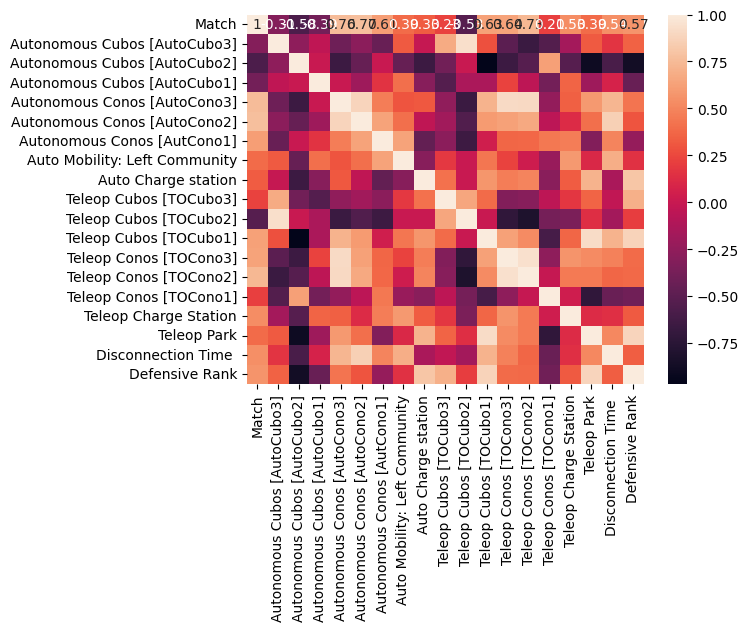

In [53]:
sb.heatmap(df_scouting_by_teams.corr(), annot=True)
mp.show()

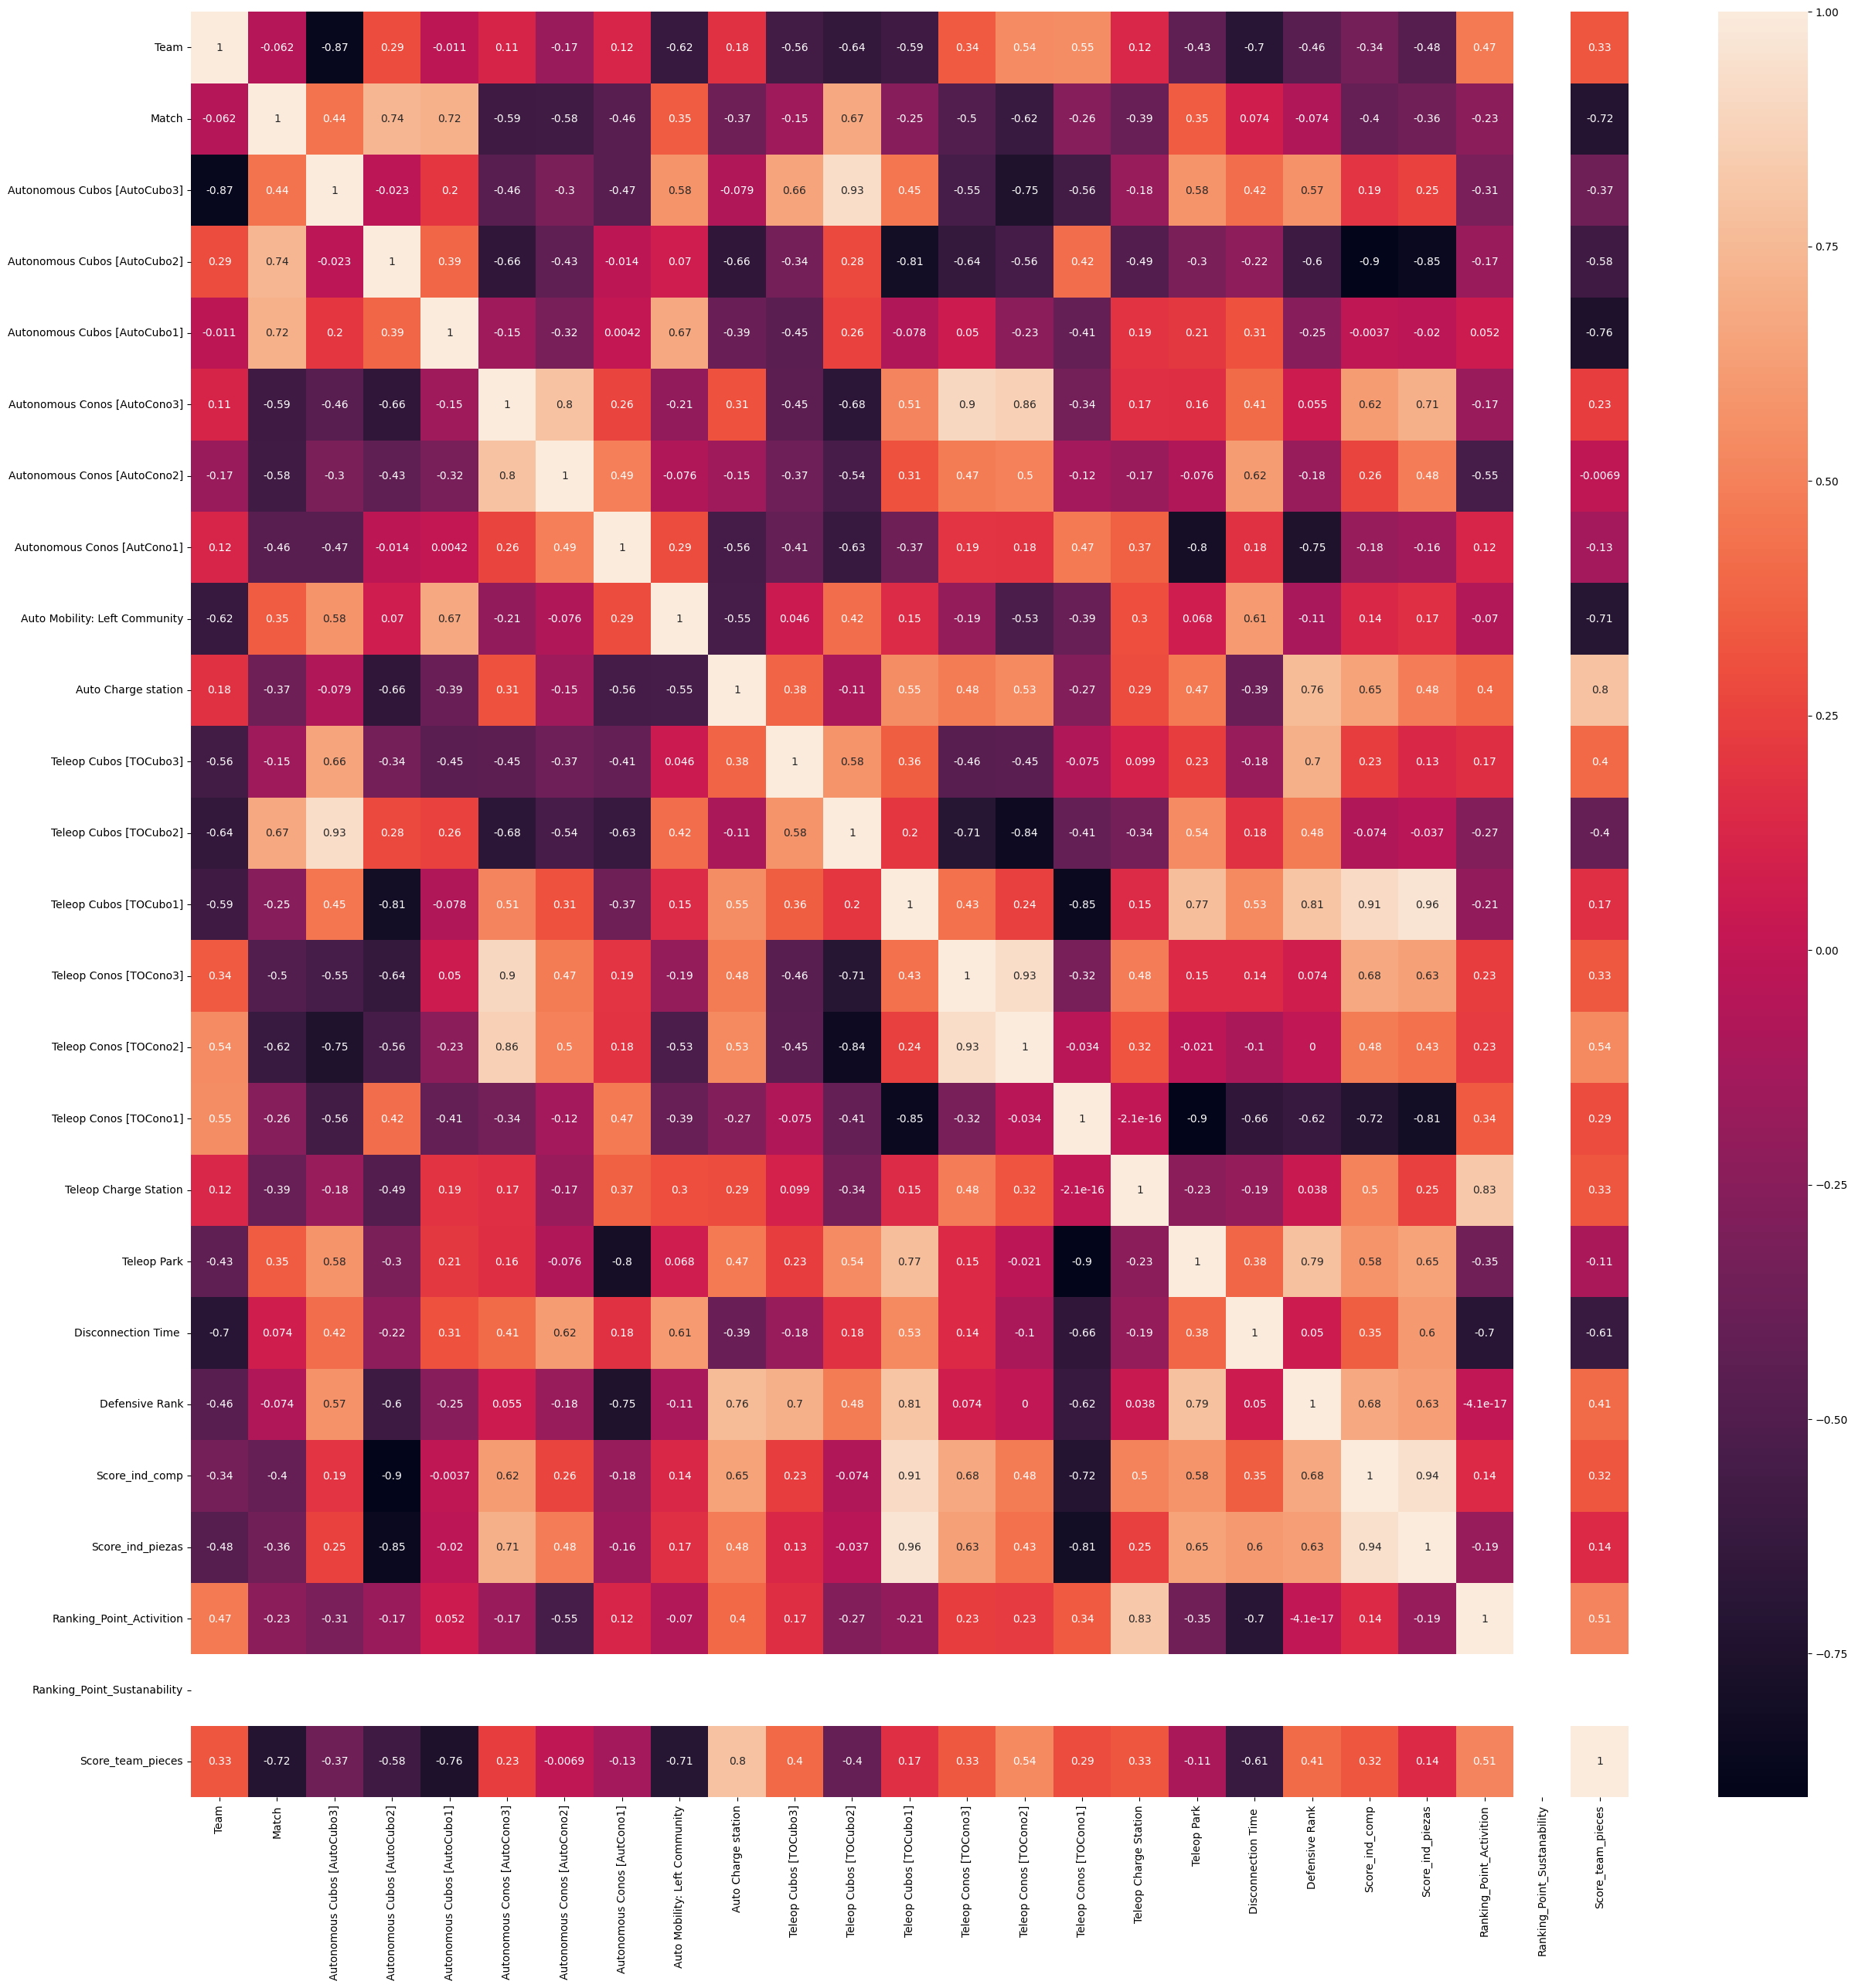

In [36]:
plt.figure(figsize=(30,30))
sb.heatmap(df_mean_all.corr(), annot=True)
mp.show()

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

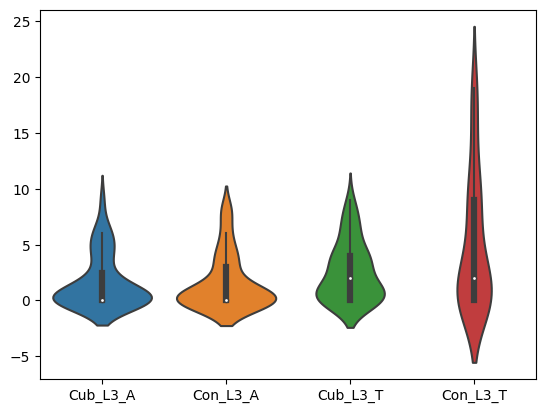

In [27]:
sb.violinplot(df_scouting_by_teams[["Cub_L3_A", "Con_L3_A", "Cub_L3_T", "Con_L3_T"]], annot=True)
mp.show()

In [54]:
train_data = df_scouting_sort_team[["Match", "Team", "Score_ind"]]
train_data

,Match,Team,Score_ind
1,1,4,70
9,3,4,52
16,2,4,14
17,2,589,23
3,1,589,80
6,1,589,34
7,3,589,31
15,2,599,35
8,3,599,23
14,2,973,25


In [57]:
listTeam = train_data["Team"].unique()
listTeam

array([   4,  589,  599,  973, 1138, 1148], dtype=int64)

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be r

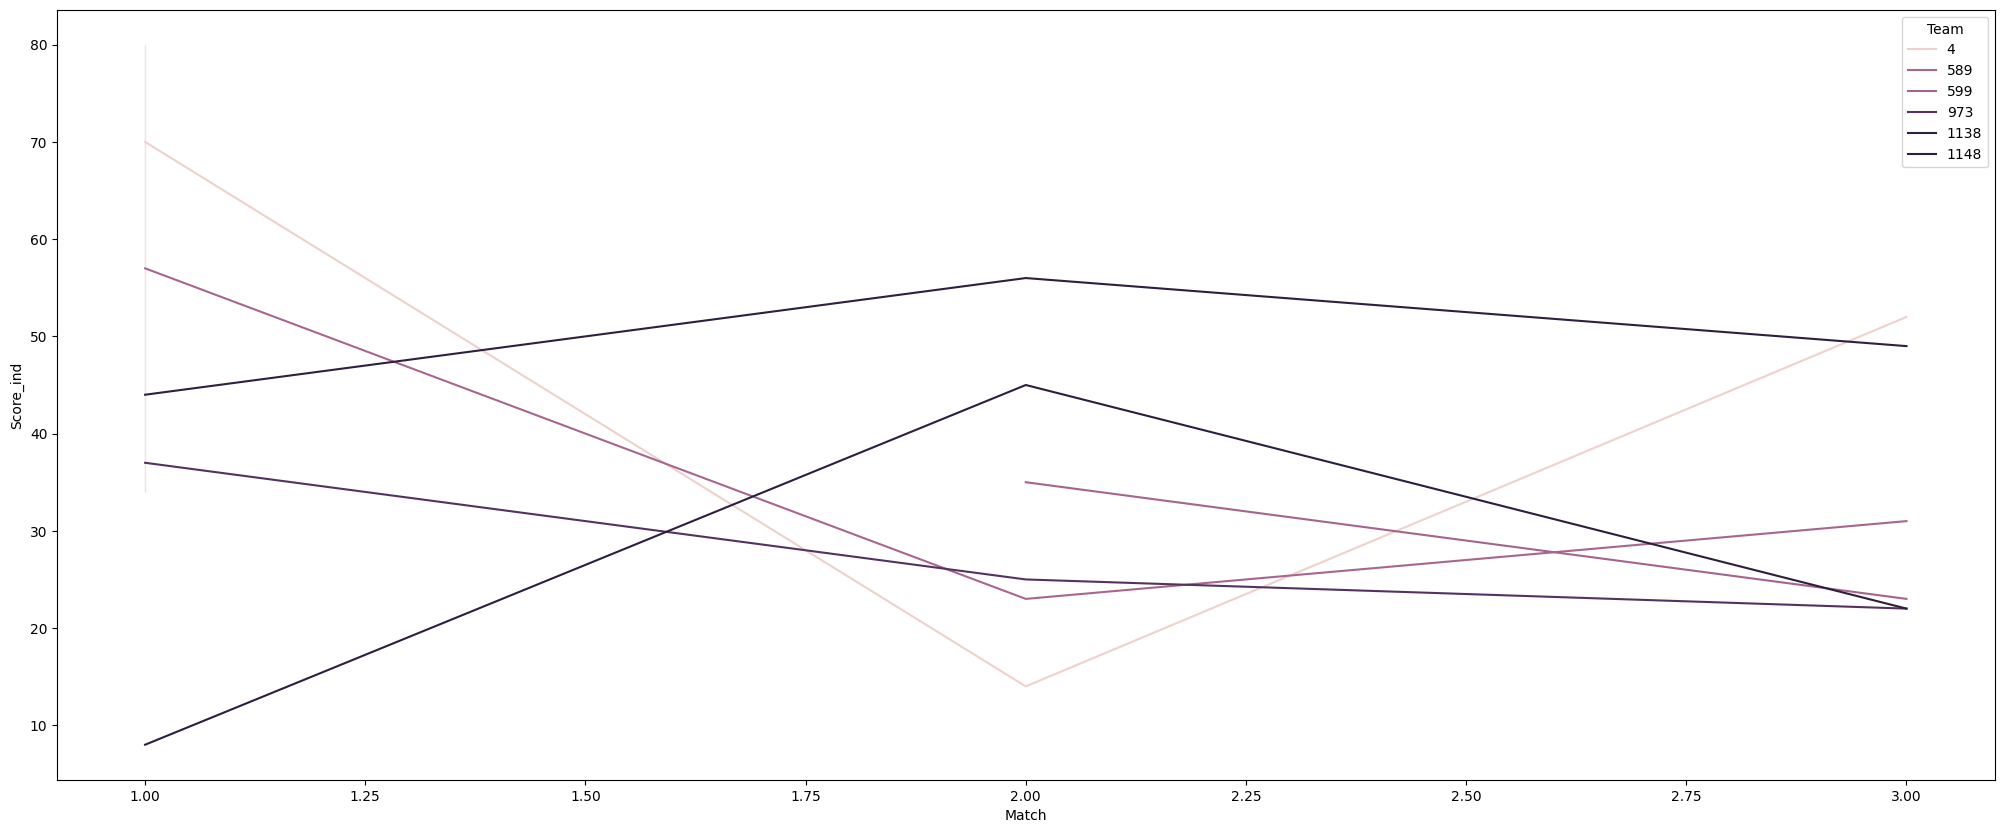

In [55]:
fig = plt.subplots(figsize=(25, 10))
sb.lineplot(data=train_data, x="Match", y="Score_ind", hue="Team")
mp.show()

In [34]:
temp_team = train_data[train_data["Team"] == 6017]
temp_team["Score_ind"].std

<bound method Series.std of 180    24
181    21
182    38
183    39
184    38
Name: Score_ind, dtype: int64>

In [66]:
df_mean_all_sort.

,Match,Autonomous Cubos [AutoCubo3],Autonomous Cubos [AutoCubo2],Autonomous Cubos [AutoCubo1],Autonomous Conos [AutoCono3],Autonomous Conos [AutoCono2],Autonomous Conos [AutCono1],Auto Mobility: Left Community,Auto Charge station,Teleop Cubos [TOCubo3],...,Teleop Cubos [TOCubo1],Teleop Conos [TOCono3],Teleop Conos [TOCono2],Teleop Conos [TOCono1],Teleop Charge Station,Teleop Park,Disconnection Time,Defensive Rank,Score_ind,Average_Dif
Team,,,,,,,,,,,,,,,,,,,,,
4,2.00,1.666667,0.000000,0.333333,0.000000,0.0,0.000000,1.000000,4.000000,1.666667,...,2.666667,0.000000,0.000000,0.00,6.666667,1.000000,10.333333,2.333333,45.333333,-9.000000
589,1.75,0.000000,0.000000,0.250000,1.000000,1.0,0.250000,0.750000,2.000000,0.500000,...,2.250000,1.250000,2.000000,0.25,5.000000,0.750000,15.000000,1.500000,42.000000,-14.909091
599,2.50,1.000000,0.500000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.500000,...,1.500000,0.000000,0.000000,0.00,3.000000,1.000000,12.500000,1.500000,29.000000,-12.000000
973,2.00,0.000000,0.333333,0.666667,0.000000,0.0,0.333333,1.000000,0.000000,0.666667,...,0.666667,0.333333,0.666667,1.00,8.666667,0.333333,5.000000,1.000000,28.000000,-7.500000
1138,2.00,0.000000,0.000000,0.666667,0.666667,0.0,0.000000,0.666667,6.666667,0.666667,...,2.333333,1.666667,2.333333,0.00,8.666667,1.000000,5.000000,2.000000,49.666667,2.500000
1148,2.00,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.333333,4.000000,1.000000,...,1.000000,0.000000,1.000000,1.00,3.333333,0.666667,0.000000,1.666667,25.000000,7.000000


c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

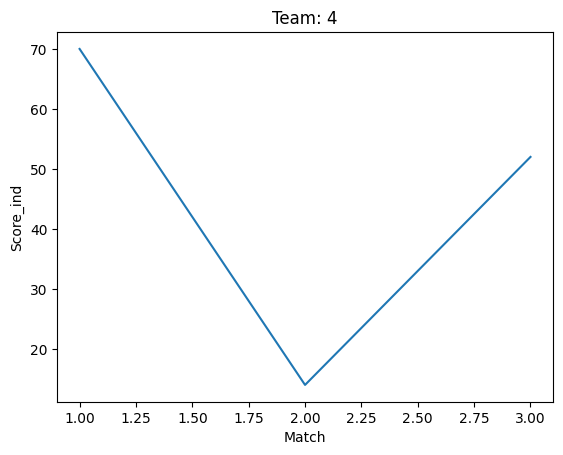

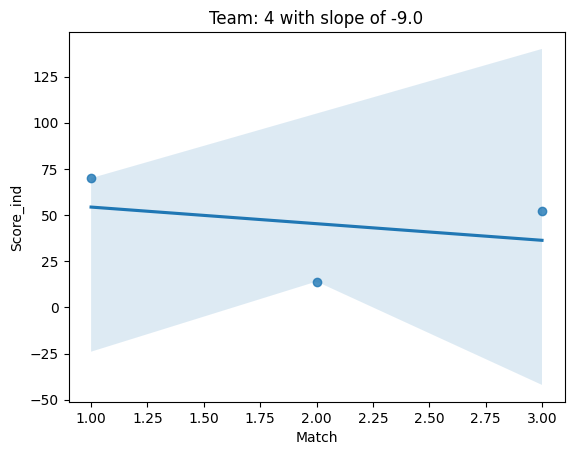

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

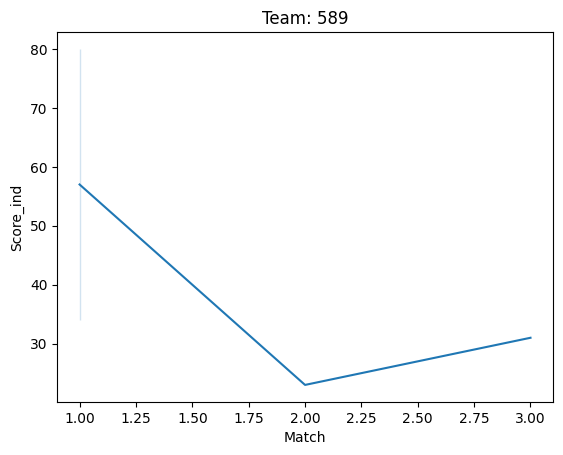

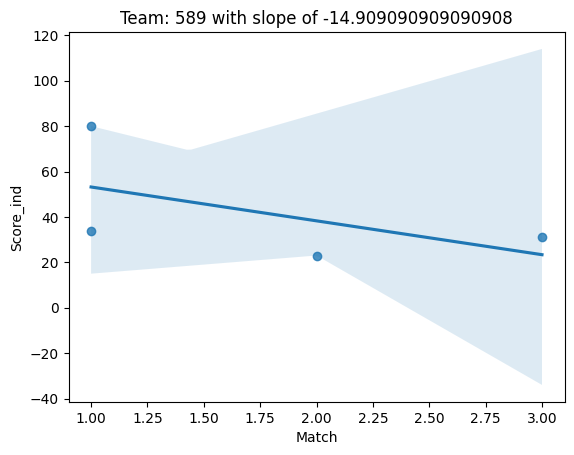

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

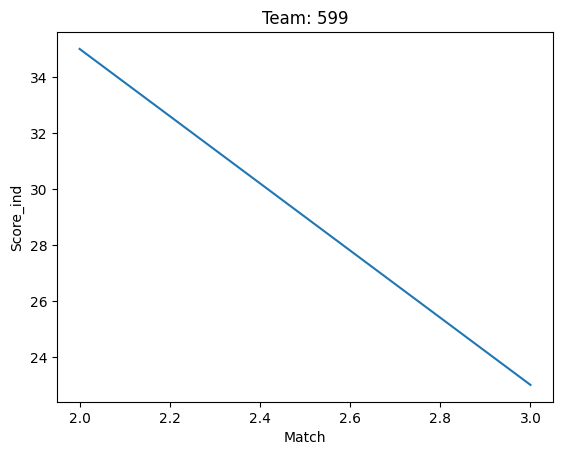

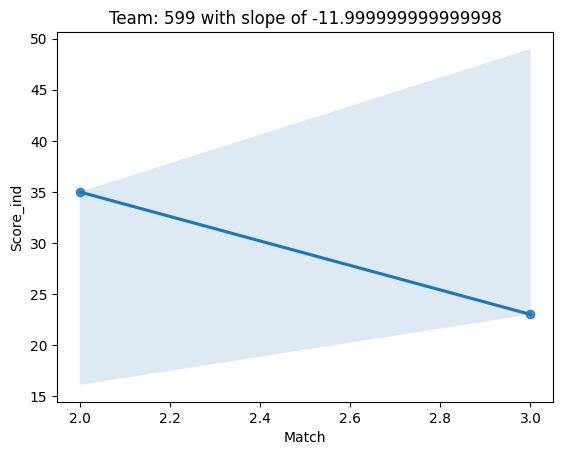

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

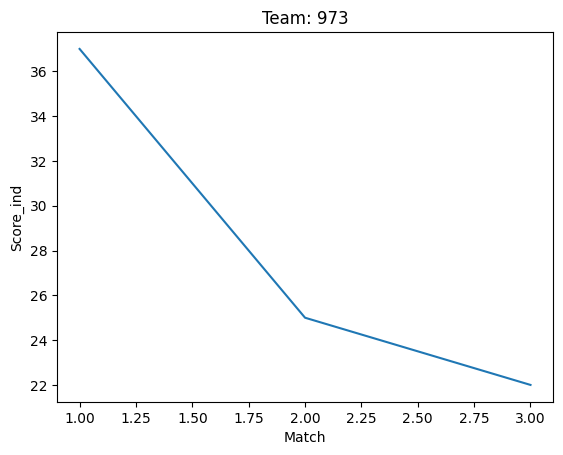

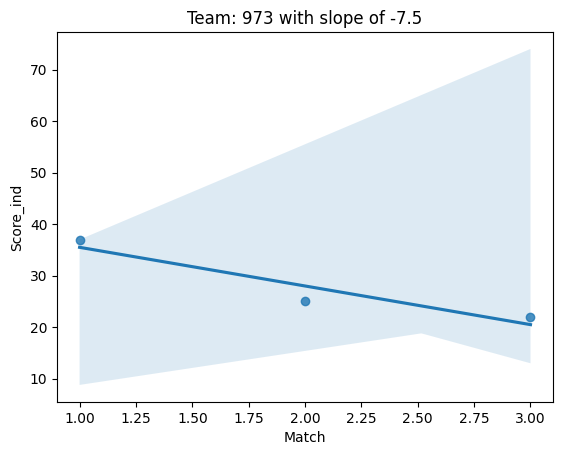

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

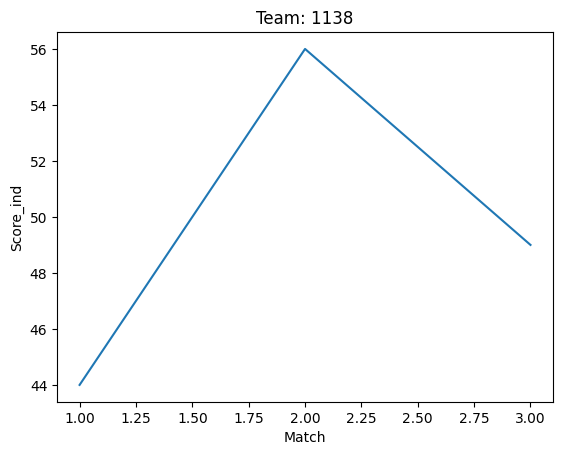

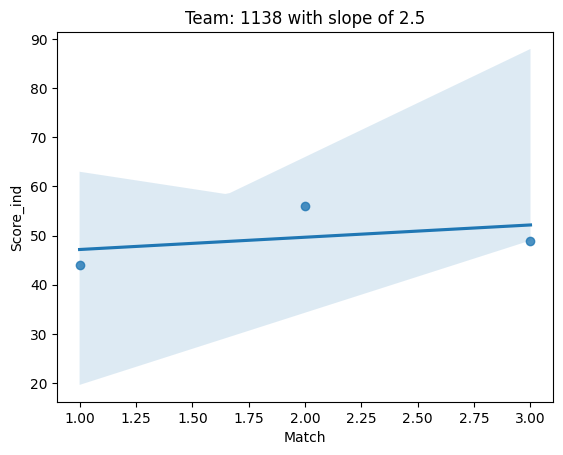

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

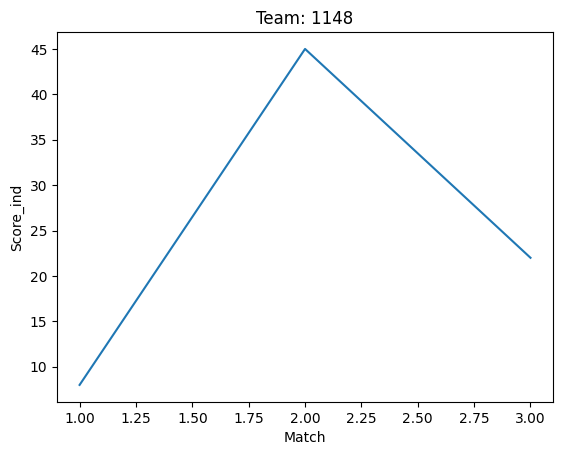

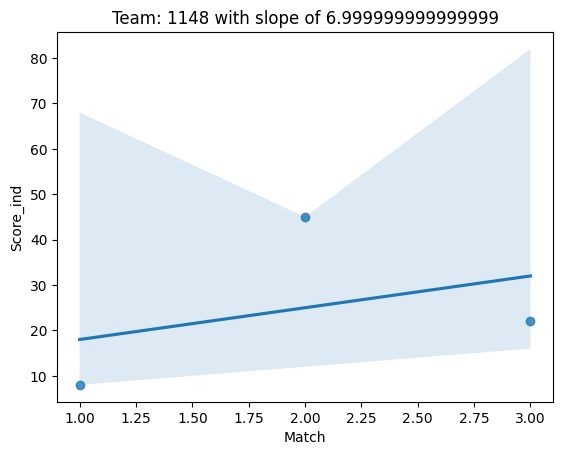

In [65]:
list_google = []
for i in listTeam:
    temp_team = train_data[train_data["Team"] == i]
    sb.lineplot(data=temp_team, x="Match", y="Score_ind").set(title=f"Team: {i}")
    mp.show()
    correlation = temp_team["Score_ind"].corr(temp_team["Match"])
    slope = ((temp_team["Score_ind"].std())/(temp_team["Match"].std())) * correlation
    list_google.append(slope)
    temp_team = train_data[train_data["Team"] == i]
    sb.regplot(data=temp_team, x="Match", y="Score_ind").set(title=f"Team: {i} with slope of {slope}")
    mp.show()
df_mean_all_sort["Average_Dif"] = list_google

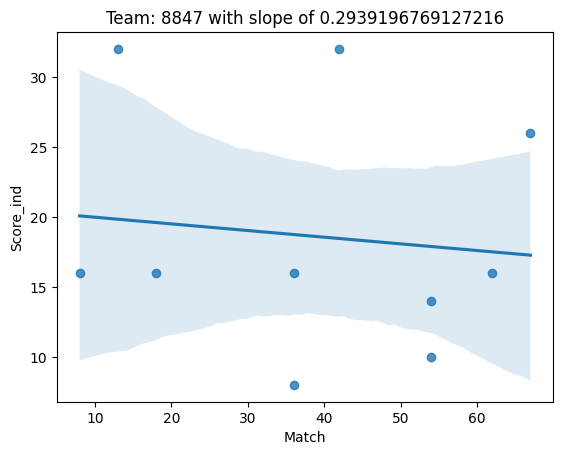

In [36]:
team_analisis = 6017
temp_team = train_data[train_data["Team"] == team_analisis]
correlation = temp_team["Score_ind"].corr(temp_team["Match"])
slope = ((temp_team["Score_ind"].std())/(temp_team["Match"].std())) * correlation
temp_team = train_data[train_data["Team"] == i]
sb.regplot(data=temp_team, x="Match", y="Score_ind").set(title=f"Team: {i} with slope of {slope}")
mp.show()

## KMeans

---

In [37]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df_scouting_by_teams)
df_scale = pd.DataFrame(scale, columns= df_scouting_by_teams.columns)
df_scale.head()

,Match,Cub_L1_A,Cub_L2_A,Cub_L3_A,Con_L1_A,Con_L2_A,Con_L3_A,Mobility,Docked_A,Engaged_A,...,Con_L1_T,Con_L2_T,Con_L3_T,Park,Docked_E,Engaged_E,Double balance,Triple balance,Disconection time,Agressiveness
0,0.334385,0.285714,0.0,0.444444,0.0,0.0,0.250,0.428571,0.25,0.250,...,0.5625,0.421053,0.473684,0.8,0.4,0.5,0.285714,0.75,0.000000,0.263158
1,0.630915,0.285714,0.4,0.111111,0.0,0.0,0.000,0.142857,0.25,0.250,...,0.4375,0.000000,0.000000,0.4,0.4,0.7,0.571429,0.75,0.055215,0.315789
2,0.624606,0.000000,0.0,0.222222,0.0,0.0,0.500,0.285714,0.25,0.375,...,0.1250,0.105263,1.000000,0.2,0.6,0.6,0.428571,0.75,0.073620,0.210526
3,0.501577,0.000000,0.2,0.111111,0.0,0.0,0.625,0.571429,0.50,0.000,...,0.2500,0.210526,1.000000,0.4,0.2,0.2,0.000000,0.50,0.006135,0.368421
4,1.000000,0.000000,0.0,0.444444,1.0,0.0,0.000,0.000000,0.00,0.000,...,0.1250,0.210526,0.000000,1.0,0.6,0.2,0.285714,0.00,0.042945,0.421053


In [38]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [39]:
pca = PCA()

In [40]:
pca.fit(df_scale)

PCA()

In [41]:
pca_summary_df = pd.DataFrame({"Proporción de la varianza" : pca.explained_variance_ratio_, "Proporción acumulada": np.cumsum(pca.explained_variance_ratio_)})
pca_summary_df

,Proporción de la varianza,Proporción acumulada
0,0.177767,0.177767
1,0.153073,0.330840
2,0.112708,0.443547
3,0.092263,0.535810
4,0.067898,0.603708
5,0.056977,0.660685
6,0.053439,0.714124
7,0.049967,0.764091
8,0.037351,0.801442
9,0.035278,0.836720


In [42]:
pca_summary_df = pca_summary_df.transpose()

In [43]:
pca_components_df = pd.DataFrame(pca.components_.transpose(), columns=pca_summary_df.columns, index=df_scouting_by_teams.columns)

In [44]:
pca_components_df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Match,0.261686,0.267488,0.034014,0.097621,-0.033610,0.334248,-0.090322,-0.133334,0.154088,0.288586,...,0.267787,0.273313,-0.249048,0.049532,-0.345695,0.270131,0.172056,-0.290042,0.165861,-0.027053
Cub_L1_A,-0.020475,0.435830,0.291515,-0.175613,-0.167995,0.027442,0.123211,0.203841,-0.087395,-0.275227,...,0.236036,-0.209861,-0.155582,-0.209189,-0.218838,-0.155947,-0.328469,0.204286,0.303019,0.038981
Cub_L2_A,-0.148113,0.055988,0.052469,0.180966,0.113080,0.136022,0.675268,-0.253392,0.061383,0.450238,...,-0.016923,-0.001472,0.012159,-0.107916,0.194656,-0.179536,-0.175034,-0.018299,0.131607,0.032511
Cub_L3_A,0.195274,-0.163993,0.101417,0.279076,0.302655,0.407464,-0.210471,0.025872,-0.161402,-0.008860,...,-0.322043,0.169078,-0.294324,-0.190482,-0.004048,-0.157106,-0.133869,0.221726,-0.032632,0.039980
Con_L1_A,-0.049471,-0.016317,-0.101221,0.072415,-0.329915,0.126583,-0.413246,-0.410800,0.191962,-0.137525,...,-0.007042,-0.046017,0.029871,-0.220302,0.251243,-0.242946,-0.007027,-0.035022,0.121304,0.071754
Con_L2_A,-0.059208,0.024216,-0.066144,0.109058,-0.077628,0.112636,-0.090945,-0.027261,0.028377,-0.074082,...,0.231982,0.270194,-0.242728,0.307210,0.162125,0.175689,-0.511844,0.316836,-0.133911,-0.013103
Con_L3_A,0.341022,-0.193949,-0.395684,-0.235777,-0.166247,-0.193980,0.169680,0.081502,0.037960,0.021386,...,-0.079128,-0.004163,-0.499515,-0.314082,0.236884,0.053767,0.014354,0.004710,0.266897,0.053572
Mobility,0.237834,0.290358,-0.171103,-0.204209,0.095718,0.127755,-0.103771,-0.010709,0.010597,0.081394,...,-0.132882,-0.305011,-0.136398,0.431695,-0.035350,-0.383065,0.095119,-0.164344,0.068827,-0.009353
Docked_A,0.244227,-0.127247,0.525004,-0.029652,-0.020826,-0.009433,0.129508,-0.057468,0.444581,-0.127470,...,-0.255132,-0.076959,-0.036910,0.199143,0.052648,0.172258,0.276341,0.360539,0.174234,0.068351
Engaged_A,0.198432,-0.055109,0.460176,0.130764,-0.163537,-0.115611,0.048911,0.140825,0.098290,-0.118626,...,0.005321,0.128961,-0.148280,-0.040508,0.197080,-0.325627,-0.164493,-0.552081,-0.299701,-0.059671


In [45]:
pca = PCA(n_components= 2)

In [46]:
principal_components = pca.fit_transform(df_scale)

In [47]:
df_pca = pd.DataFrame(data = principal_components, columns=['PC1', 'PC2'])
df_pca

,PC1,PC2
0,0.234719,0.036794
1,0.136403,0.658630
2,0.881192,-0.498063
3,0.617695,-0.581487
4,-0.265305,0.080130
5,-0.354631,-0.309036
6,-0.598149,0.103074
7,-0.420414,-0.285123
8,0.251672,-0.629598
9,0.878589,-0.529219


c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='PC1', ylabel='PC2'>

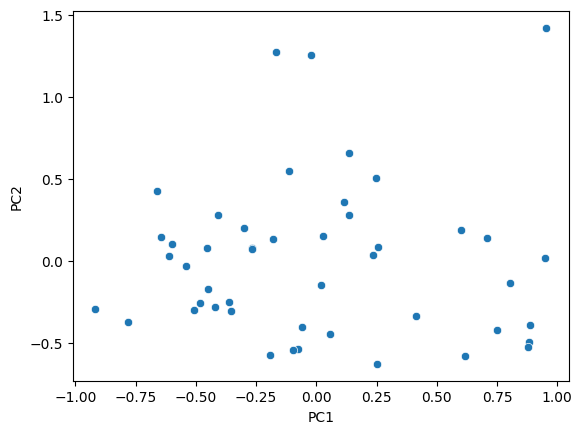

In [48]:
sb.scatterplot(y='PC2', x='PC1', data=df_pca)

In [49]:
K = range(2, 12)

inertias = []

for i in K:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scale) # entrenamiento de k-means con pca
  inertias.append(kmeans.inertia_)

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416:

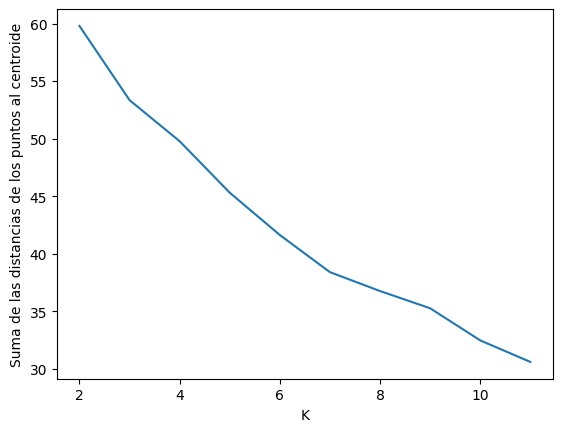

In [50]:
plt.plot(K, inertias) 
plt.xlabel("K")
plt.ylabel("Suma de las distancias de los puntos al centroide")
plt.show()

In [51]:
km = KMeans(n_clusters=6) # 4 K por el método del codo
km.fit_predict(df_scale)

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([4, 4, 0, 0, 2, 3, 3, 3, 1, 0, 2, 4, 4, 2, 5, 3, 3, 3, 1, 1, 1, 4,
       4, 1, 1, 3, 2, 2, 4, 4, 3, 1, 0, 0, 3, 3, 3, 3, 3, 0, 3, 1, 5, 0,
       5, 2, 5])

In [52]:
df_pca["Clusters"] = km.labels_
df_pca.head()

,PC1,PC2,Clusters
0,0.234719,0.036794,4
1,0.136403,0.658630,4
2,0.881192,-0.498063,0
3,0.617695,-0.581487,0
4,-0.265305,0.080130,2


c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='PC1', ylabel='PC2'>

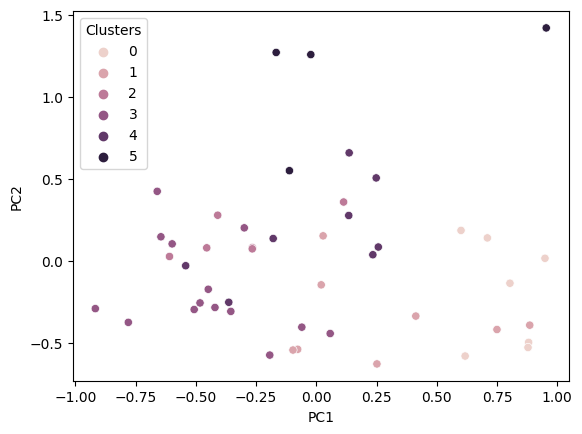

In [53]:
sb.scatterplot(y='PC2', x='PC1', hue = 'Clusters', data=df_pca)

In [54]:
df_scouting_by_teams.head()

,Match,Cub_L1_A,Cub_L2_A,Cub_L3_A,Con_L1_A,Con_L2_A,Con_L3_A,Mobility,Docked_A,Engaged_A,...,Con_L1_T,Con_L2_T,Con_L3_T,Park,Docked_E,Engaged_E,Double balance,Triple balance,Disconection time,Agressiveness
Team,,,,,,,,,,,,,,,,,,,,,
93,213,2,0,4,0,0,2,5,1,2,...,9,8,9,5,2,5,2,3,0,11
537,307,2,2,1,0,0,0,3,1,2,...,7,0,0,3,2,7,4,3,9,12
706,305,0,0,2,0,0,4,4,1,3,...,2,2,19,2,3,6,3,3,12,10
930,266,0,1,1,0,0,5,6,2,0,...,4,4,19,3,1,2,0,2,1,13
1091,424,0,0,4,3,0,0,2,0,0,...,2,4,0,6,3,2,2,0,7,14


In [55]:
df_scouting_by_teams["Clusters"] = km.labels_
df_scouting_by_teams.head()

,Match,Cub_L1_A,Cub_L2_A,Cub_L3_A,Con_L1_A,Con_L2_A,Con_L3_A,Mobility,Docked_A,Engaged_A,...,Con_L2_T,Con_L3_T,Park,Docked_E,Engaged_E,Double balance,Triple balance,Disconection time,Agressiveness,Clusters
Team,,,,,,,,,,,,,,,,,,,,,
93,213,2,0,4,0,0,2,5,1,2,...,8,9,5,2,5,2,3,0,11,4
537,307,2,2,1,0,0,0,3,1,2,...,0,0,3,2,7,4,3,9,12,4
706,305,0,0,2,0,0,4,4,1,3,...,2,19,2,3,6,3,3,12,10,0
930,266,0,1,1,0,0,5,6,2,0,...,4,19,3,1,2,0,2,1,13,0
1091,424,0,0,4,3,0,0,2,0,0,...,4,0,6,3,2,2,0,7,14,2


In [56]:
df_scouting_by_teams.sort_values(by=["Clusters"])

,Match,Cub_L1_A,Cub_L2_A,Cub_L3_A,Con_L1_A,Con_L2_A,Con_L3_A,Mobility,Docked_A,Engaged_A,...,Con_L2_T,Con_L3_T,Park,Docked_E,Engaged_E,Double balance,Triple balance,Disconection time,Agressiveness,Clusters
Team,,,,,,,,,,,,,,,,,,,,,
8701,374,0,0,0,0,0,8,6,0,0,...,0,5,5,3,5,2,3,0,13,0
706,305,0,0,2,0,0,4,4,1,3,...,2,19,2,3,6,3,3,12,10,0
930,266,0,1,1,0,0,5,6,2,0,...,4,19,3,1,2,0,2,1,13,0
6421,272,0,0,1,1,0,6,6,3,4,...,2,2,3,5,6,3,2,3,17,0
6574,253,0,0,1,0,0,6,7,0,2,...,9,8,5,2,4,2,1,3,25,0
1732,305,0,0,7,0,0,8,6,1,1,...,3,16,4,1,3,1,2,0,12,0
8096,263,0,0,0,0,0,8,7,1,1,...,0,9,5,4,3,3,1,2,13,0
4786,331,1,1,6,0,0,0,3,3,7,...,6,19,3,5,5,4,0,7,11,1
3197,234,1,1,3,0,0,0,3,2,4,...,3,10,1,4,2,1,1,0,6,1


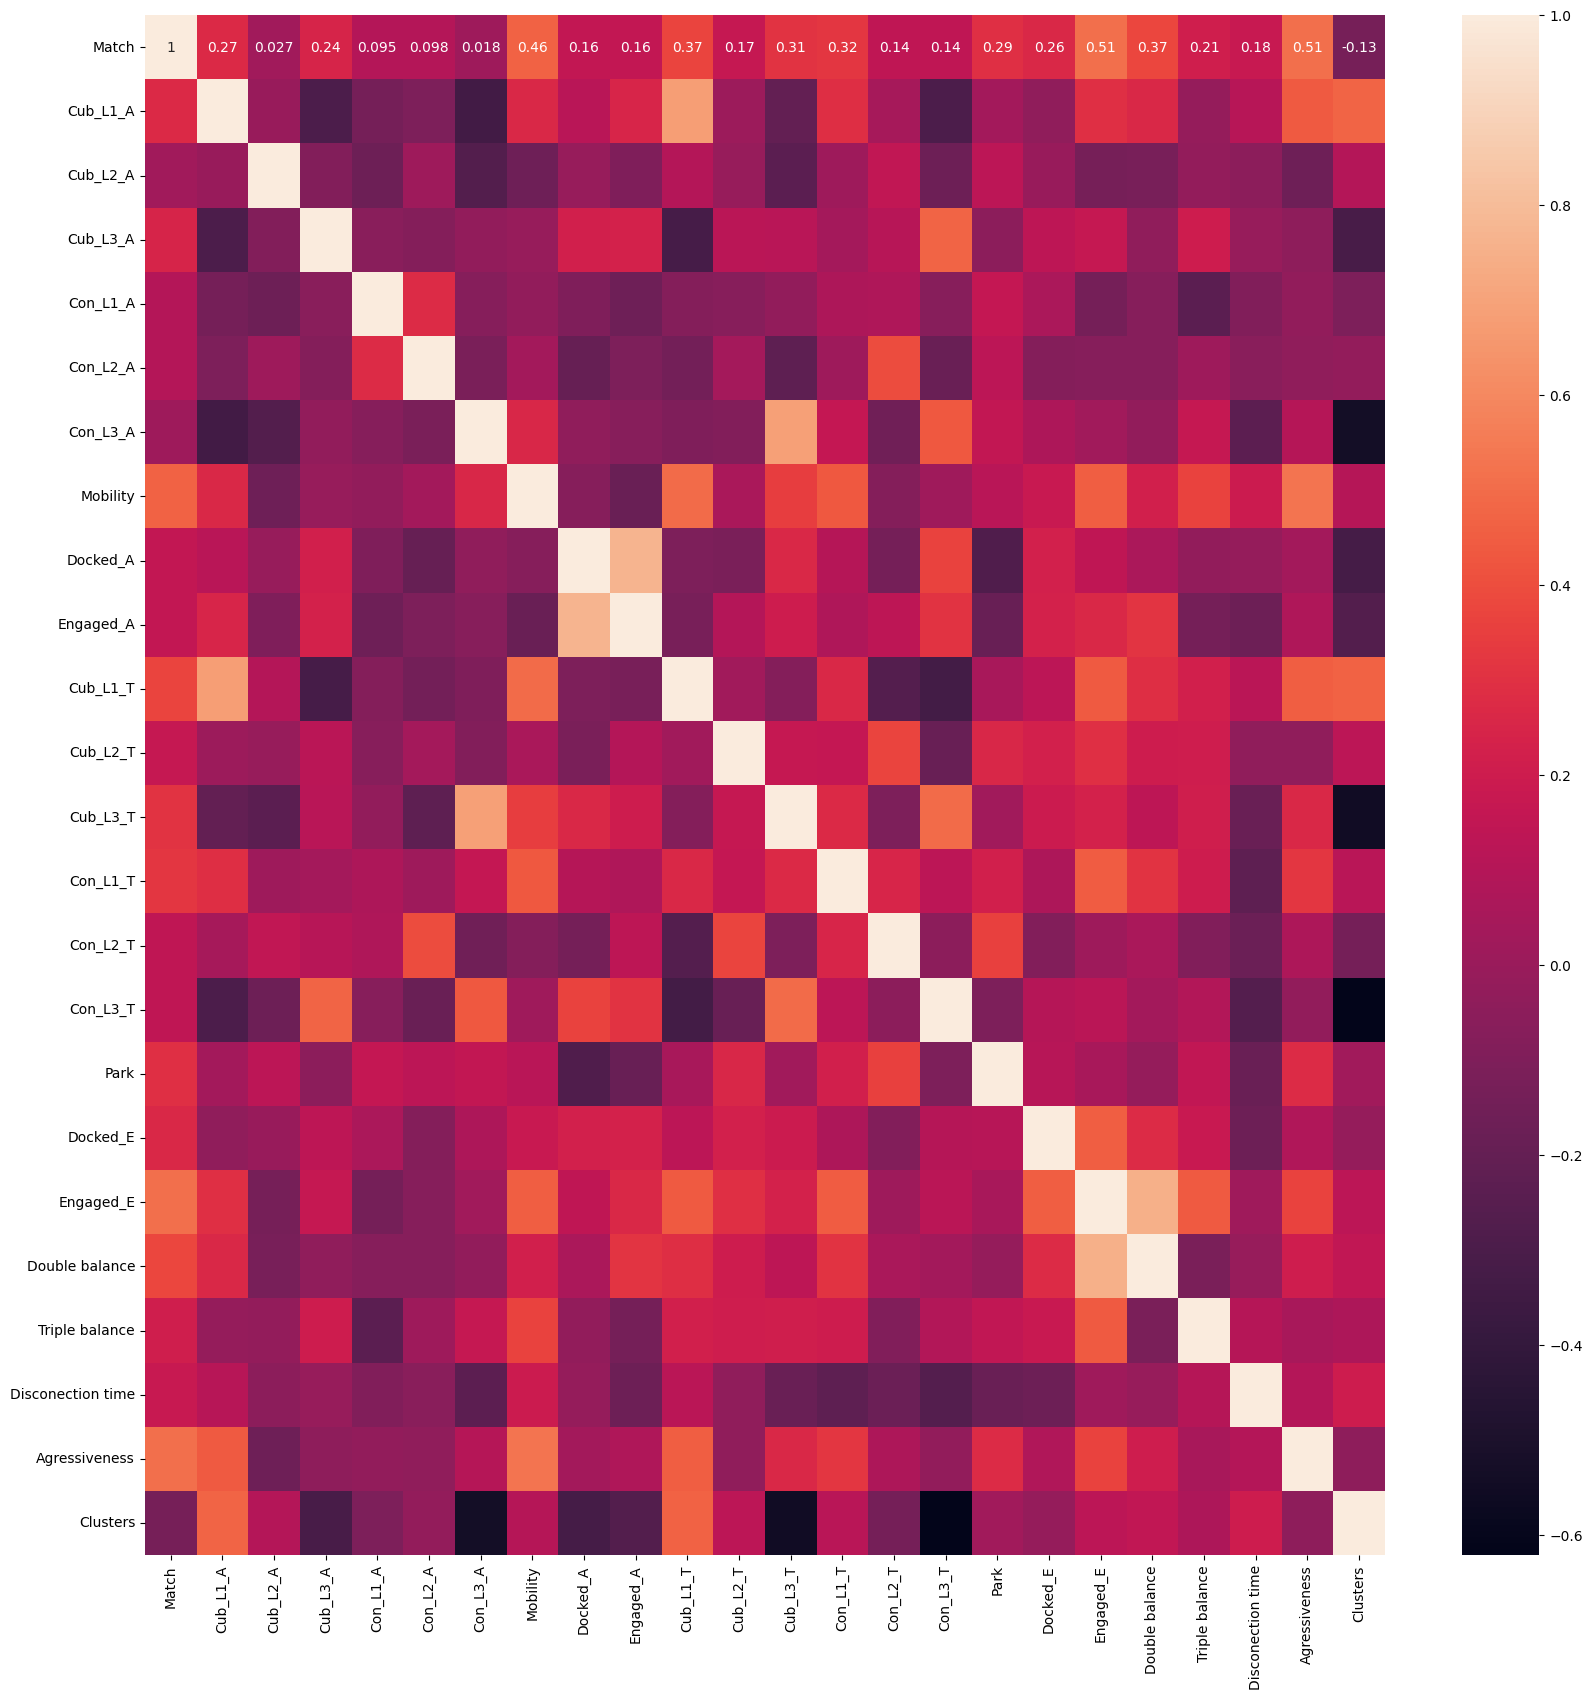

In [57]:
mp.figure(figsize=(20,20))
sb.heatmap(df_scouting_by_teams.corr(), annot=True)
mp.show()

In [58]:
df_scouting_by_teams.corr()

,Match,Cub_L1_A,Cub_L2_A,Cub_L3_A,Con_L1_A,Con_L2_A,Con_L3_A,Mobility,Docked_A,Engaged_A,...,Con_L2_T,Con_L3_T,Park,Docked_E,Engaged_E,Double balance,Triple balance,Disconection time,Agressiveness,Clusters
Match,1.000000,0.265792,0.027218,0.241561,0.095494,0.098473,0.018061,0.462517,0.156927,0.155999,...,0.142584,0.139504,0.294944,0.262072,0.507591,0.374438,0.213743,0.176693,0.511650,-0.131119
Cub_L1_A,0.265792,1.000000,-0.003838,-0.295148,-0.138360,-0.105133,-0.340947,0.260166,0.116785,0.250261,...,0.049214,-0.295861,0.031727,-0.033669,0.295773,0.265304,-0.015548,0.112600,0.437394,0.472246
Cub_L2_A,0.027218,-0.003838,1.000000,-0.088102,-0.171193,0.013960,-0.269208,-0.159310,-0.012839,-0.100443,...,0.150763,-0.165415,0.129495,-0.000505,-0.128899,-0.120749,-0.019649,-0.049116,-0.163947,0.098144
Cub_L3_A,0.241561,-0.295148,-0.088102,1.000000,-0.061611,-0.082117,-0.031849,-0.009439,0.219044,0.229550,...,0.108538,0.471181,-0.045619,0.135542,0.165897,-0.038013,0.200554,-0.009122,-0.040014,-0.314926
Con_L1_A,0.095494,-0.138360,-0.171193,-0.061611,1.000000,0.276520,-0.073239,-0.028471,-0.101481,-0.159285,...,0.079974,-0.068509,0.162276,0.064640,-0.134294,-0.070591,-0.235707,-0.090595,-0.030235,-0.104548
Con_L2_A,0.098473,-0.105133,0.013960,-0.082117,0.276520,1.000000,-0.117050,0.036366,-0.191961,-0.104896,...,0.394293,-0.179392,0.127069,-0.082565,-0.070214,-0.073625,0.013450,-0.062434,-0.035952,-0.022073
Con_L3_A,0.018061,-0.340947,-0.269208,-0.031849,-0.073239,-0.117050,1.000000,0.257282,-0.036672,-0.067609,...,-0.156694,0.433219,0.157026,0.070620,0.026465,-0.028286,0.168334,-0.230076,0.103826,-0.533285
Mobility,0.462517,0.260166,-0.159310,-0.009439,-0.028471,0.036366,0.257282,1.000000,-0.076233,-0.182671,...,-0.077430,0.019159,0.115155,0.177271,0.455188,0.220669,0.366833,0.193244,0.526833,0.102758
Docked_A,0.156927,0.116785,-0.012839,0.219044,-0.101481,-0.191961,-0.036672,-0.076233,1.000000,0.766411,...,-0.136932,0.360864,-0.282811,0.223605,0.139260,0.067712,-0.025890,-0.017178,0.033574,-0.328924
Engaged_A,0.155999,0.250261,-0.100443,0.229550,-0.159285,-0.104896,-0.067609,-0.182671,0.766411,1.000000,...,0.138216,0.308469,-0.187717,0.231457,0.265117,0.313243,-0.136323,-0.168349,0.079997,-0.271550


: 

---